### Дипломная работа по курсу "Python для анализа данных"

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### 1. Загрузите файл HR.csv в pandas dataframe

In [94]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Признаки:
1.satisfaction_level​ - Уровень удовлетворенности работой
2.Last_evaluation ​- Время с момента последней оценки в годах
3.number_projects​ - Количество проектов, выполненных за время работы
4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5.time_spend_company​ - Стаж работы в компании в годах
6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left​ - уволился ли сотрудник
8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9.department ​- отдел в котором работает сотрудник
10.salary​ - относительный уровень зарплаты

In [52]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

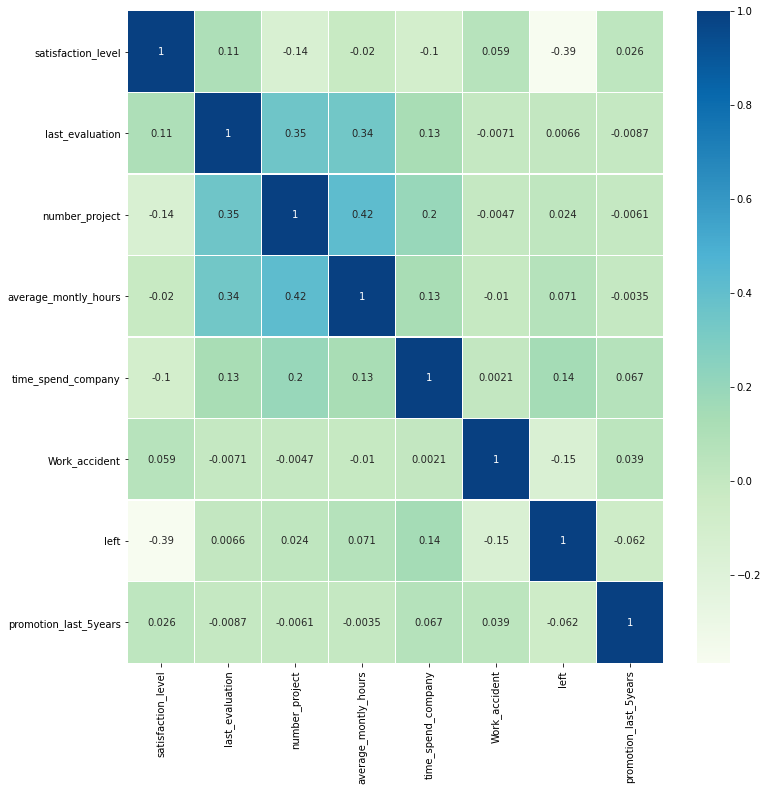

In [6]:
sns.heatmap(hr.corr(),annot=True,cmap='GnBu',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Самые скоррелированные переменные: "average_monthly_hours" и "Last_evaluation" от "number_projects". 
Наимененее скоррелированные переменные: "satisfaction_level" и "work_accident" от "left".

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [31]:
hr_count = hr.groupby('department').count()[['satisfaction_level']].reset_index()
hr_count.columns = ['Департамент', 'Количество сотрудников']
hr_count

,Департамент,Количество сотрудников
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


### 5. Показать распределение сотрудников по зарплатам.

In [34]:
hr_salary = hr.groupby('salary').count()[['satisfaction_level']].reset_index()
hr_salary.columns = ['Уровень зарплат', 'Количество сотрудников']
hr_salary

,Уровень зарплат,Количество сотрудников
0,high,1237
1,low,7316
2,medium,6446


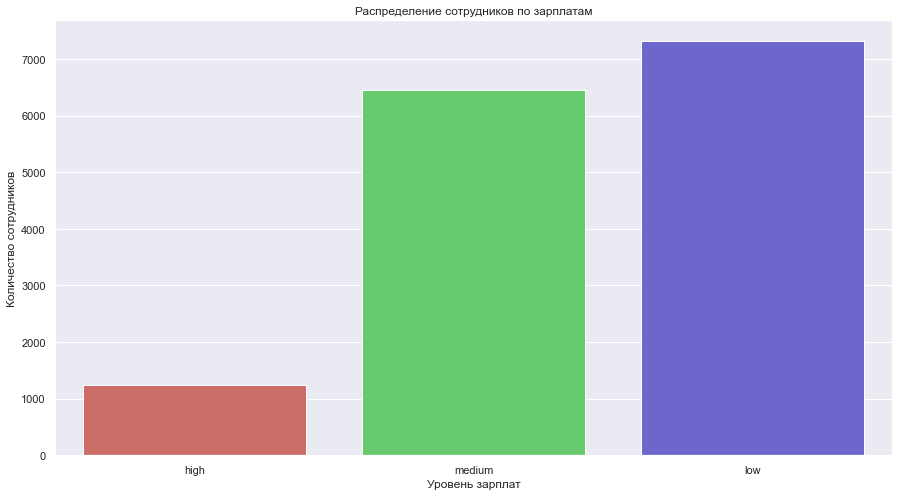

In [186]:
plt.figure(figsize=(15,8)) 
sns.barplot(x = 'Уровень зарплат', y = "Количество сотрудников", data = hr_salary, 
            palette = 'hls', order = ['high', 'medium', 'low']).set_title('Распределение сотрудников по зарплатам')
plt.show()

В компании работает больше сотрудников с низким уровнем зарплаты

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [46]:
hr_salary_dep = hr.groupby(['department', 'salary']).count()[['satisfaction_level']].reset_index()
hr_salary_dep.columns = ['Департамент', 'Уровень зарплат', 'Количество сотрудников']  
hr_salary_dep.head()

,Департамент,Уровень зарплат,Количество сотрудников
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364


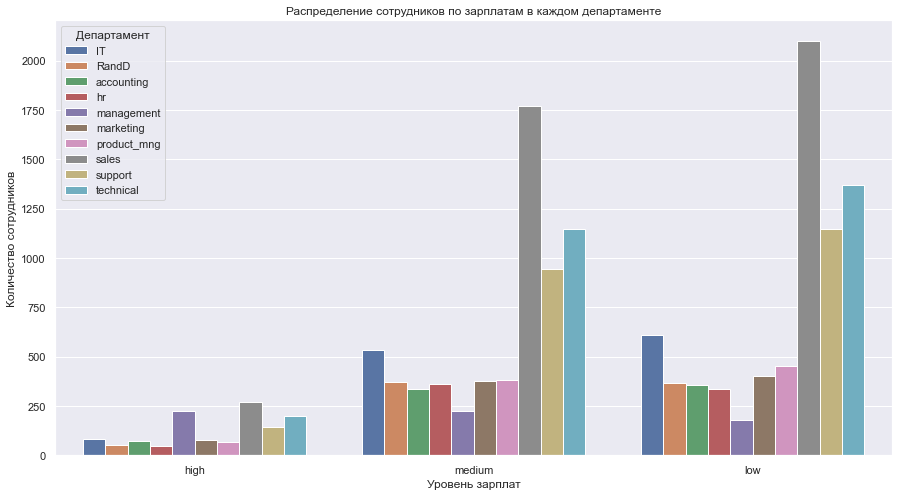

In [196]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Уровень зарплат', y = 'Количество сотрудников', 
            hue = "Департамент", order = ['high', 'medium', 'low'], data = hr_salary_dep).set_title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.show()

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [164]:
from scipy import stats

In [166]:
s_salary_h = hr[hr['salary'] == 'high']['average_montly_hours']
s_salary_l = hr[hr['salary'] == 'low']['average_montly_hours']
stats.ttest_ind(s_salary_h, s_salary_l)

Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ponchy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


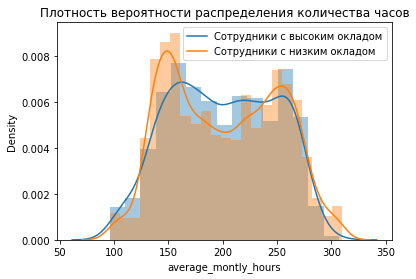

In [168]:
sns.distplot(s_salary_h)
sns.distplot(s_salary_l)
plt.title('Плотность вероятности распределения количества часов')
plt.legend(['Сотрудники с высоким окладом', 'Сотрудники с низким окладом'])
plt.show()

 Сотрудники с высоким окладом не проводят на работе больше времени, чем сотрудники с низким окладом. 
 Разница между временем на работе при высокой и низкой зарплате статистически незначима (pvalue=0.46). 

### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):   
●Доля сотрудников с повышением за последние 5 лет   
●Средняя степень удовлетворенности   
●Среднее количество проектов

In [58]:
# left  0 - работает   1 - уволился
# promotion_last_5years 0 - не повышали  1 - повышали

In [59]:
# проверяю количество уникальных значений в столбце с увольнениями
n = len(pd.unique(hr['left']))
n

2

In [103]:
# разделяю датасет, сначала анализируем показатели среди не уволившихся сотрудников
hr_worked = hr.loc[hr['left'] == 0]
hr_worked

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [104]:
hr_worked.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [197]:
# повышение среди не уволившихся
promotion = hr_worked.loc[hr_worked['promotion_last_5years'] == 1]
print('Доля сотрудников с повышением за последние пять лет среди не уволившихся:', 
      round((len(promotion) / len(hr_worked))*100, 2), '%')

Доля сотрудников с повышением за последние пять лет среди не уволившихся: 2.63 %


In [198]:
# степень удовлетворенности от 0 до 1

print('Средняя степень удовлетворенности среди не уволившихся:', 
      round(hr_worked['satisfaction_level'].mean(), 2))

Средняя степень удовлетворенности среди не уволившихся: 0.67


In [199]:
# количество проектов от 2 до 6

print('Среднее количество проектов среди не уволившихся:', round(hr_worked['number_project'].mean()))

Среднее количество проектов среди не уволившихся: 4


In [200]:
#  анализируем показатели среди уволившихся сотрудников
hr_left = hr.loc[hr['left'] == 1]
hr_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [201]:
hr_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [202]:
# повышение среди уволившихся
promotion = hr_left.loc[hr_left['promotion_last_5years'] == 1]
print('Доля сотрудников с повышением за последние пять лет среди уволившихся:', 
      round((len(promotion) / len(hr.left))*100, 2), '%')

Доля сотрудников с повышением за последние пять лет среди уволившихся: 0.13 %


In [203]:
# степень удовлетворенности от 0 до 1

print('Средняя степень удовлетворенности среди уволившихся:', 
      round(hr_left['satisfaction_level'].mean(), 2))

Средняя степень удовлетворенности среди уволившихся: 0.44


In [204]:
# количество проектов от 2 до 7    МОЖЕТ КОЛИЧЕСТВО ПРОЕКТОВ ОКРУГЛИТЬ ДО ЦЕЛОГО????


print('Среднее количество проектов среди уволившихся:', round(hr_left['number_project'].mean()))

Среднее количество проектов среди уволившихся: 4


### 9. Разделить данные на тестовую и обучающую выборки.    
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).   
Оценить качество модели на тестовой выборки

In [109]:
from matplotlib import colors
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [121]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [125]:
X = hr[['satisfaction_level', 'last_evaluation',
        'number_project', 'average_montly_hours', 'time_spend_company',
        'Work_accident', 'promotion_last_5years']]

In [127]:
y = hr['left']

In [129]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [133]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [137]:
model = LinearDiscriminantAnalysis()

In [154]:
# обучаем данные
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [146]:
# определяем метод оценки модели
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [159]:
#оценка модели
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.7615171002890816


точность модели 76%

In [148]:
# делаем прогноз на тестовой выборке
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [156]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test.values, model.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,0


In [ ]:
#другим методом проверим точность модели

from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_test, model.predict(X_test))

0.7584

точность модели 75%